# By Manish Chetpalli

# The Sparks Foundation 

# Data Science and Business Analytics Internship 

# Task 1 - Prediction using Supervisded ML
### {For this task we will be applying Linear Regression algorithm for predicting student's percentage based on the no. of study hours} 

### Data Source - http://bit.ly/w-data
### Problem statement - What will be the predicted score if a student studies for 9.25 hours/day?

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# Reading the csv file
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Checking for null values
print(df.isnull().sum())
print('NO NULL VALUES PRESENT')

Hours     0
Scores    0
dtype: int64
NO NULL VALUES PRESENT


In [4]:
# Description of the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


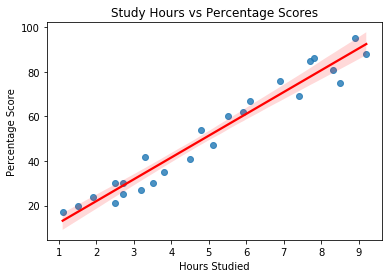

In [5]:
# Plotting the distribution of the data 
sns.regplot(x=df['Hours'], y=df['Scores'], line_kws={'color':'r'})  
plt.title('Study Hours vs Percentage Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

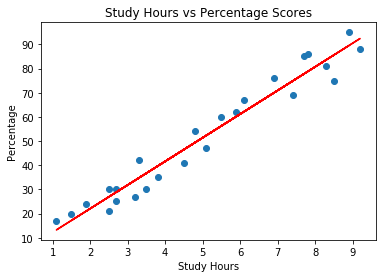

2.4836734053732172
9.775803390787466


In [6]:
# Plotting regressor plot to determine the relationship between feature and target

X = df.Hours
Y = df.Scores
def estimate_coef(x, y):
    # number of observations/points
    n = len(x)
 
    # mean of x and y vector
    m_x, m_y = np.mean(x), np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - (n*m_y*m_x)
    SS_xx = np.sum(x*x) - (n*m_x*m_x)
 
    # calculating regression coefficients
    b_1 = (SS_xy / SS_xx)
    b_0 = (m_y - b_1*m_x)
    return(b_0, b_1)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "r")
 
    # putting labels
    plt.title('Study Hours vs Percentage Scores')
    plt.xlabel('Study Hours')
    plt.ylabel('Percentage')
    plt.show()
 
    # function to show plot
values = estimate_coef(X,Y)
plot_regression_line(X,Y,values)
intercept, slope = values
print(intercept)
print(slope)

In [7]:
#Data PreProcessing
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [8]:
# Splitting the data into test and training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
# Initiliasing a Linear Regression model and fitting it on training set 

Lr = LinearRegression()  
Lr.fit(X_train, y_train) 
y_pred = Lr.predict(X_test)
print(y_pred)
print ("Slope: ", Lr.coef_[0])
print ("Intercept: ", Lr.intercept_)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]
Slope:  9.91065648064224
Intercept:  2.018160041434662


In [10]:
print('The error between slope of our model and scikit-learn\'s model: ', abs(Lr.coef_[0] - slope))
print('The error between intercept of our model and scikit-learn\'s model: ', abs(Lr.intercept_ - intercept))

The error between slope of our model and scikit-learn's model:  0.13485308985477396
The error between intercept of our model and scikit-learn's model:  0.46551336393855536


In [11]:
#Creating a dataframe of predicted and actual values
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


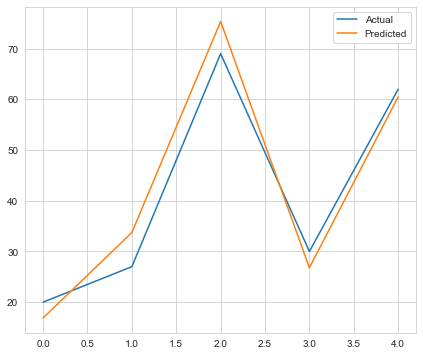

In [12]:
# Comparing actual and predicted values
sns.set_style('whitegrid')
df1.plot(kind='line',figsize=(7,6))

In [13]:
print("Training Score:",Lr.score(X_train,y_train))
print("Test Score:",Lr.score(X_test,y_test))

Training Score: 0.9515510725211553
Test Score: 0.9454906892105354


In [14]:
#Predicting on particular data point
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
pred = Lr.predict(test)
print('If you study for {} hrs, You will get {} marks'.format(hours, pred[0]))

If you study for 9.25 hrs, You will get 93.69173248737539 marks


In [15]:
#Evalution of the model
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error is {}'.format(mae))

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error is {}'.format(mse))

rmse = mse**0.5
print('Root Mean Squared Error is {}'.format(rmse))

rsquared = r2_score(y_test,y_pred)
print('R-Squared Error is {}'.format(rsquared))

Mean Absolute Error is 4.183859899002982
Mean Squared Error is 21.598769307217456
Root Mean Squared Error is 4.647447612100373
R-Squared Error is 0.9454906892105354


#### R-squared gives the goodness of the fit and as can be seen it is 96.7% which is really good. This means that the algorithm has proven to be good for the given data.
#### It can also be said that the model's accuracy is 96.78%
